In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import csv
import matplotlib.pyplot as plt

        
starFile = "/kaggle/input/starresearchproject/6 class csv.csv"
        


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# Brown Dwarf -> Star Type = 0
# Red Dwarf -> Star Type = 1
# White Dwarf -> Star Type = 2
# Main Sequence -> Star Type = 3
# Supergiant -> Star Type = 4
# Hypergiant -> Star Type = 5

In [53]:
data = pd.read_csv(starFile)

In [54]:
#there are 40 of each stars
#to make things faster, variables are going to store each index 
#of the data variable (star stuff)'s column and what they represent for future reference

temp = data.iloc[:,0]
luminosity = data.iloc[:,1]
radius = data.iloc[:,2]
absMagnitude = data.iloc[:,3]
starType = data.iloc[:,4]
starColor = data.iloc[:,5]
spectralClass = data.iloc[:,6]

#and just to make things even faster, these will be stored into an array for certain utlities

allColumns = [temp, luminosity, radius, absMagnitude, starType, starColor, spectralClass]

# **Defining each component of the chart**

**Index 0, Temperature:**

Kelvin is used to describe the temperature of something: like f and c obv. Know that a kelvin of 273.1 is freezing point of water, and 373.1 is the boiling point of water. A kelvin of 0 is callaed "Absolute zero", coldest to be known for a system.

**Index 1, Luminosity:**

a luminosity of 1 is that of our star to us. Luminosity is the absolute measure of electromagnetic power

**Index 2, Radius:**

In this case, the radius is compared to that of our sun. So a radius of 1 is the radius of our sun so that star has the same radius as that of our sun. Less than one than the star is smaller, bigger than one, bigger.

**Index 3, Absolute Magnitude:**

Is the apparent magnitude a star would have if it were placed 10 parsecs from the Earth, this being 3.26 lightyears per parsec. One parsec corresponds to the distance at which the mean radius of the earth's orbit suspends an angle of one second of arc. The absolute magnitude of the sun is -26.75

**Index 4, Star Type:**

Just represents the star type by a number

**Index 5, Star Color:**

Self explanatory

**Index 6, Spectral Class:**

Categorizes the certain star (row) to a specific size


# here is a visual of data compared to sun or human understandable terms
#  |
#  |
#  |
# \\/

# index 0, Temperature

Too hot for human Existence:  240


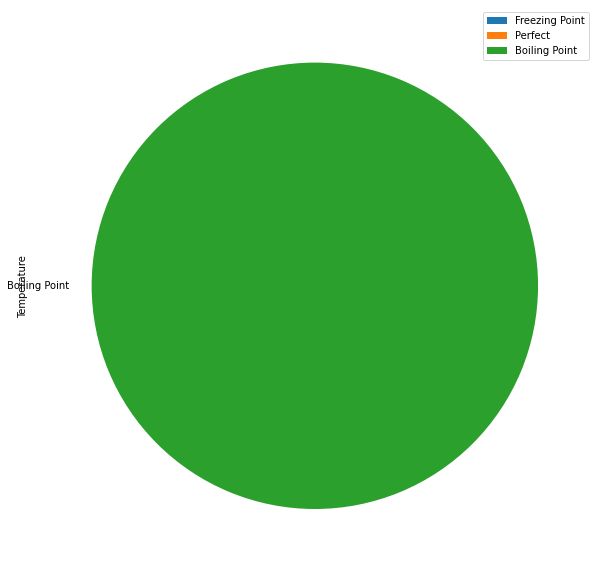

In [55]:
index = 0 
freezingPointOfWater = 0 
boilingPointOfWater = 0 
habitableForHumans = 0

#index 0

for i in temp: 
    if i < 273.1:
        freezingPointOfWater += 1 
    elif i > 288.15 and i < 298.15: 
        habitableForHumans += 1 
    elif i > 373.1: 
            boilingPointOfWater += 1

pieChartForTemp = pd.DataFrame({ 
    "Temperature": [freezingPointOfWater, habitableForHumans, boilingPointOfWater], }, index = ["Freezing Point", "Perfect", "Boiling Point"])
plot1 = pieChartForTemp.plot.pie(y = "Temperature", figsize=(10,20))

print("Too hot for human Existence: ", boilingPointOfWater)

# index 1, Luminosity

Lum greater than sun:  113
Lum less than sun:  127


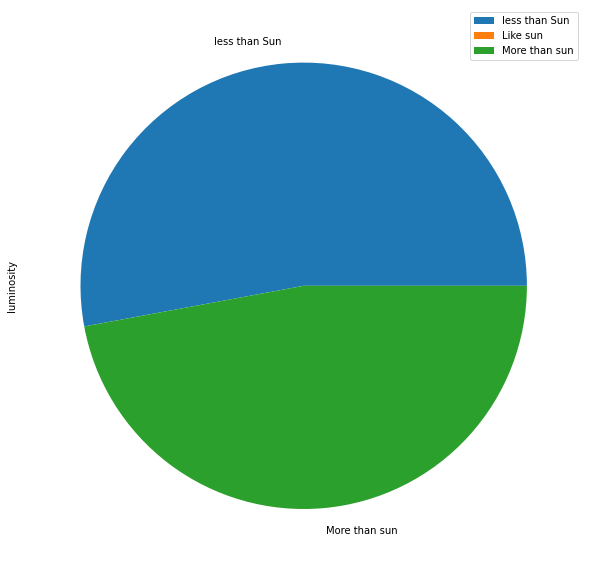

In [56]:
greaterThanSun = 0 
lessThanSun = 0 
likeSun = 0

for i in luminosity: 
    if i > 1: 
        greaterThanSun += 1 
    elif i < 1: 
        lessThanSun += 1 
    else: likeSun += 1

pieChartForLum = pd.DataFrame({ 
    "luminosity": [lessThanSun, likeSun, greaterThanSun], }, index=["less than Sun", "Like sun", "More than sun"])

plot2 = pieChartForLum.plot.pie(y = "luminosity", figsize=(10,20))
print("Lum greater than sun: ", greaterThanSun)
print("Lum less than sun: ", lessThanSun)


# Index 2, Radius

Bigger than sun:  113
Smaller than sun:  127


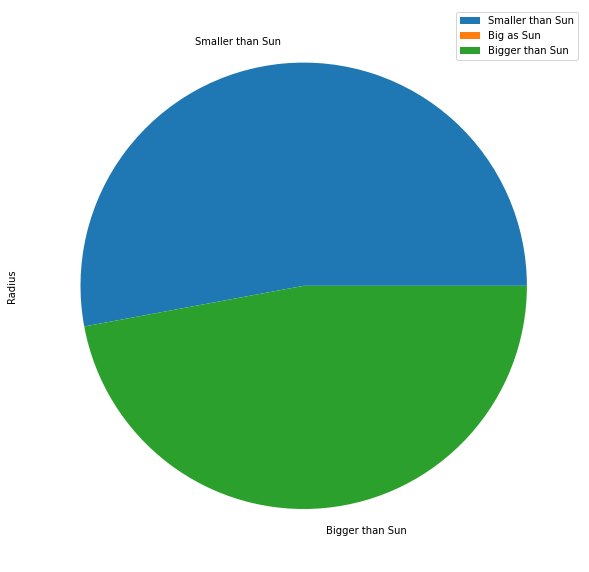

In [57]:
biggerThanSun = 0
smallerThanSun = 0
likeSun = 0

for rad in radius:
    if rad > 1:
        biggerThanSun += 1
    elif rad < 1:
        smallerThanSun += 1
    else:
        likeSun += 1
        
radPieChart = pd.DataFrame({
    "Radius": [smallerThanSun, likeSun, biggerThanSun],
}, index = ["Smaller than Sun", "Big as Sun", "Bigger than Sun"])

radiusPieChart = radPieChart.plot.pie(y = "Radius", figsize=(10,20))
print("Bigger than sun: ", biggerThanSun)
print("Smaller than sun: ", smallerThanSun)

# index 3, Absolute Magnitude

Every star has a greater absolute magitude than our sun


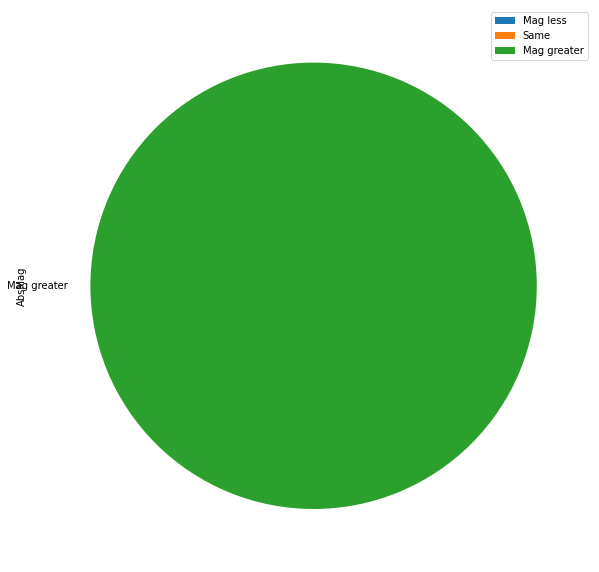

In [58]:
magnitudeGreaterThanSun = 0
magnitudeLessThanSun = 0
magnitudeSameAsSun = 0
MAGNITUDE_OF_SUN = -26.75

for magn in absMagnitude:
    if magn > MAGNITUDE_OF_SUN:
        magnitudeGreaterThanSun += 1
    elif magn < MAGNITUDE_OF_SUN:
        magnitudeLessThanSun += 1
    else:
        magnitudeSameAsSun += 1
        
magnPieChart = pd.DataFrame({
    "AbsMag": [magnitudeLessThanSun, magnitudeSameAsSun, magnitudeGreaterThanSun],
}, index = ["Mag less", "Same", "Mag greater"])

magPC = magnPieChart.plot.pie(y = "AbsMag", figsize=(10,20))
print("Every star has a greater absolute magitude than our sun")

# Index 4, Star Type:

There are 40 stars for each type


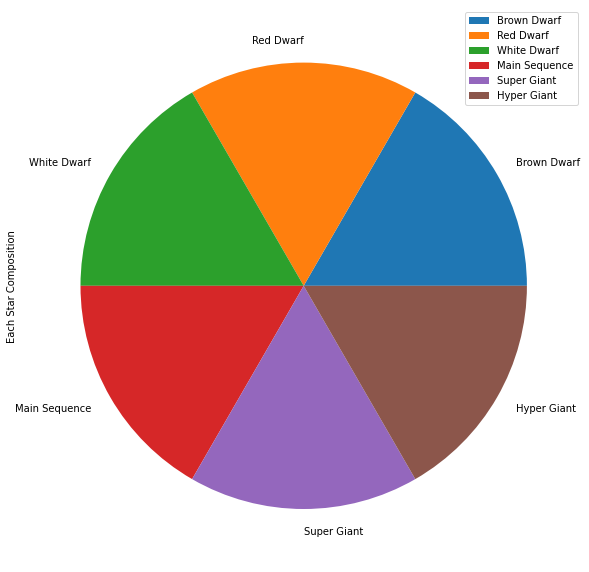

In [59]:
#check what is how many stars of each type are present in the data, and depict a percetange of each one
#in a pie chart


# Brown Dwarf -> Star Type = 0
# Red Dwarf -> Star Type = 1
# White Dwarf -> Star Type = 2
# Main Sequence -> Star Type = 3
# Supergiant -> Star Type = 4
# Hypergiant -> Star Type = 5

#initialize the value of each star type

brownDwarf = 0
redDwarf = 0
whiteDwarf = 0
mainSequence = 0
superGiant = 0
hyperGiant = 0

lengthOfColumnStarType = len(starType)


for i in starType:
    if i == 0:
        brownDwarf += 1
    elif i == 1:
        redDwarf += 1
    elif i == 2:
        whiteDwarf += 1
    elif i == 3:
        mainSequence += 1
    elif i == 4:
        superGiant += 1
    elif i == 5:
        hyperGiant += 1
        

pieChart = pd.DataFrame({
    "Each Star Composition": [brownDwarf, redDwarf, whiteDwarf, mainSequence, superGiant, hyperGiant]
}, index = ["Brown Dwarf", "Red Dwarf", "White Dwarf", "Main Sequence", "Super Giant", "Hyper Giant"])

plot = pieChart.plot.pie(y = "Each Star Composition", figsize=(10,20))
print("There are 40 stars for each type")

# Index 5, Star Color:

# Index 6, Spectral Class:

In [ ]:
for item, character in spectralClass:
    if()

# 

Text(0, 0.5, 'Temperature (K)')

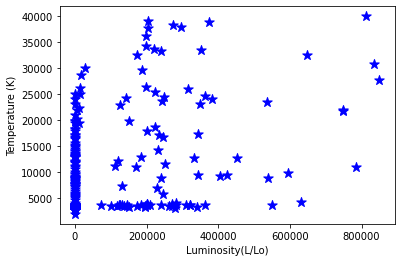

In [60]:
#this will show the relationship between color, luminosity, and temperature

plt.scatter(luminosity, temp, label = "star", color = "blue", marker = "*", s=100)
plt.xlabel("Luminosity(L/Lo)")
plt.ylabel("Temperature (K)")